In [28]:
#importamos tensorflow y numpy
import tensorflow as tf
import numpy as np
import pandas as pd

In [29]:
#declaramos arreglos en np de celsius y fahrenheit para la capa de entrada que usara para aprender
#celsius = np.array([-40, -10, 0, 8, 15, 22, 38, 43, 54, 67], dtype=float)
#fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100, 109.4, 129.2, 152.6], dtype=float)
temperaturas = pd.read_csv("datasets/TemperaturasCelsiusFahrenheit.csv")
celsius = temperaturas.Celsius
fahrenheit = temperaturas.Fahrenheit


In [30]:
#diseñamos nuestro modelo de red neuronal con tensorflow y keras
#keras nos ayuda ahorrar lineas de codigo al hacer nuestras capas de redes neuronales
#espeficicamos la capa de salida como tipo densa que tienen conexiones de cada neurona a todas la neuronas
#especificamos  las units, neuronas de la capa, usamos la variable input_shape para especificar una entrada con una neurona
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#usamos el modelo de keras secuencial y le indicamos que capa usamos
modelo = tf.keras.Sequential([capa])


In [31]:
#preparamos el modelo para ser entrenado definiendo algunas propiedades
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    #indicamos la propiedad de optimizador con la funcion Adam para que la red sepa como ajustar los pesos y sesgos
    #con una taza de aprendizaje de 0.1 para el ajuste de pesos y sesgos
    #usamos mean_squared para la funcion de perdida
    loss='mean_squared_error'
)


In [32]:
#empezamos el entrenamiento del modelo
print("Empezando entrenamiento...")
#usamos la funcion fit para el entrenamiento indicandole los datos de entrada y resultados esperados
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)#con epochos indicamos la cantidad de vueltas debe intentarlo
print("Modelo entrenado! :D")

Empezando entrenamiento...
Modelo entrenado! :D


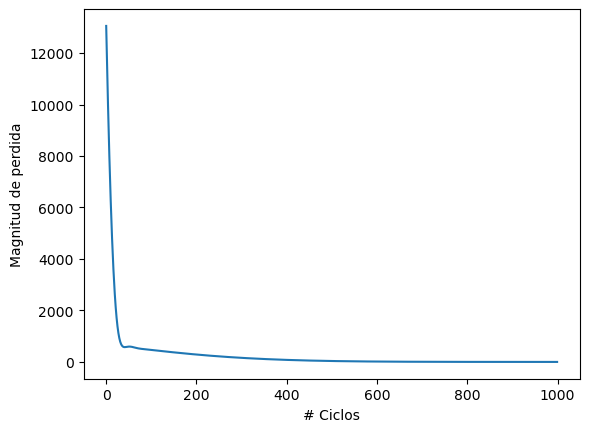

In [33]:
#observemos el resultado de la funcion de perdida antes de intentar predecir para ver como le fue a la red en cada vuelta
import matplotlib.pyplot as plt
plt.xlabel("# Ciclos")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [38]:
#Comencemos con las predicciones, usando un valor que no este en los arreglos de celsius ni fahrenheit
print("Primera prediccion")
dato = input("Introduce la cantidad de grados celsius que deseas convertir a fahrenheit")
dato = float(dato)
resultado = modelo.predict([dato])
print("El resultado es " + str(resultado) + " Fahrenheit")

Primera prediccion
1/1 [==============================] - 0s 155ms/step
El resultado es [[212.17001]] Fahrenheit


In [37]:
#ahora veamos que valores uso para el peso de las conexiones y el sesgo en los nodos
print("variables internas del modelo")
print(capa.get_weights())#usamos get_weights para que nos muestre los valores que uso


variables internas del modelo
[array([[1.8063847]], dtype=float32), array([31.531532], dtype=float32)]
